In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Thompson Sampling

In [2]:
class RestaurantThompsonSampler():
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma
        self.prior_mu_of_mu = 0
        self.prior_sigma_of_mu = 1000
        self.post_mu_of_mu = self.prior_mu_of_mu
        self.post_sigma_of_mu = self.prior_sigma_of_mu

        self.n = 0
        self.sum_satisfaction = 0
                
    def get_mu_from_current_distribution(self):
        samp_mu = np.random.normal(self.post_mu_of_mu, self.post_sigma_of_mu)
        return samp_mu
    
    def get_satisfaction_from_true_distribution(self):
        s = np.random.normal(self.mu, self.sigma)
        self.n += 1
        self.sum_satisfaction += s
        return s
    
    def update_current_distribution(self):
        self.post_sigma_of_mu = np.sqrt((1 / self.prior_sigma_of_mu**2 + self.n / self.sigma**2)**-1)
        self.post_mu_of_mu = (self.post_sigma_of_mu**2) * ((self.prior_mu_of_mu / self.prior_sigma_of_mu**2) + (self.sum_satisfaction / self.sigma**2))

In [3]:
def draw_distributions(R,i):
    for r in R:
        samps = np.random.normal(r.post_mu_of_mu, r.post_sigma_of_mu, 10000)
        sns.kdeplot(samps, fill=True)
    plt.title('Iteration %s'%(i+1), fontsize=20)
    plt.legend(['mu=%s'%(r.mu) for r in R], fontsize=16)
    plt.xlim(-10,10)
    plt.xlabel('Average Satisfacton', fontsize=20)
    plt.ylabel('Density', fontsize=20)
    
    plt.show()

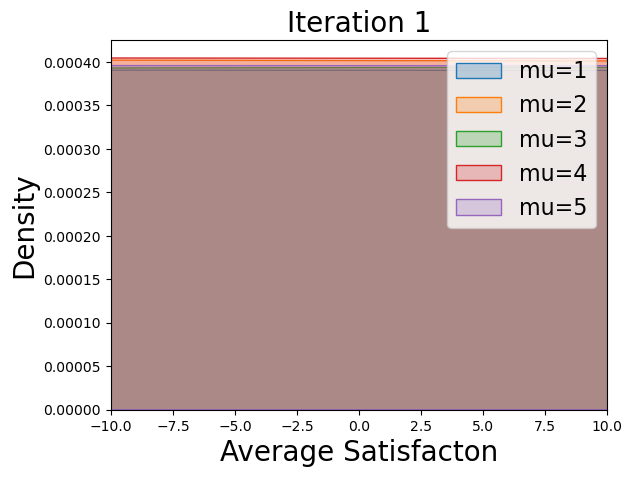

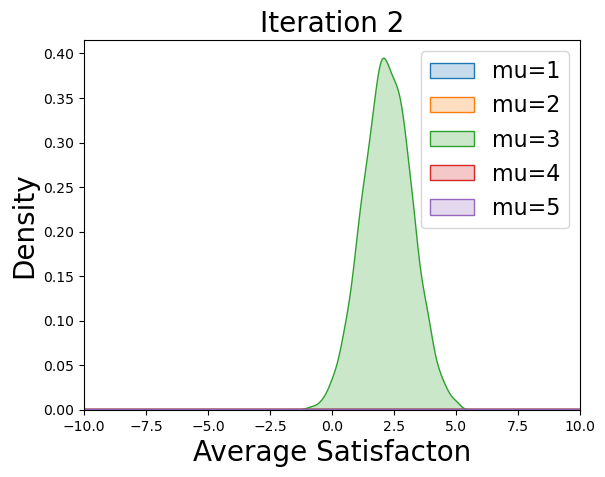

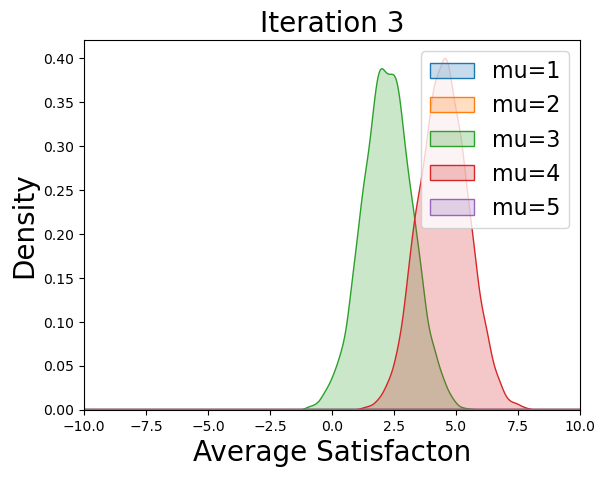

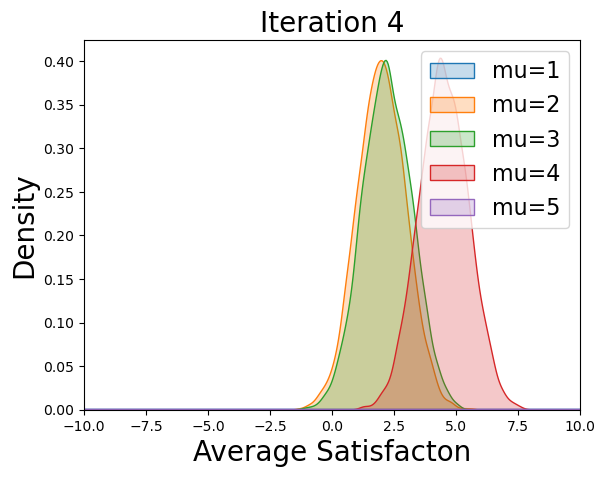

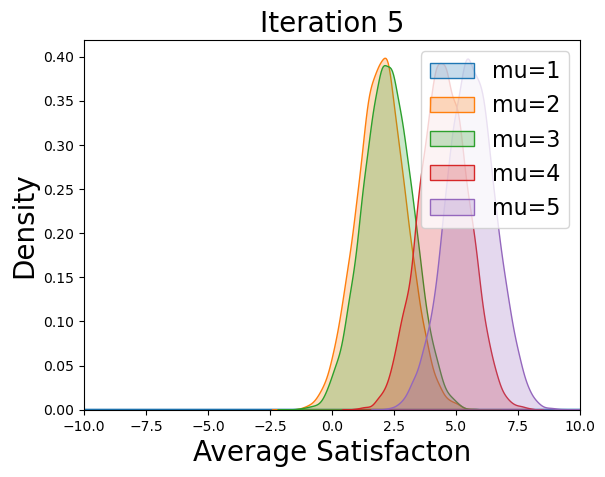

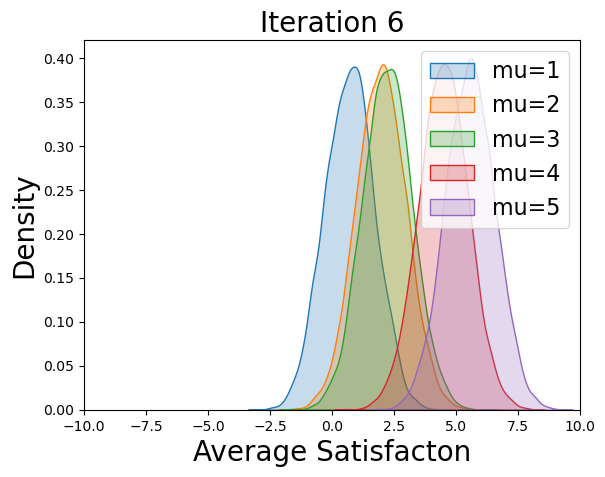

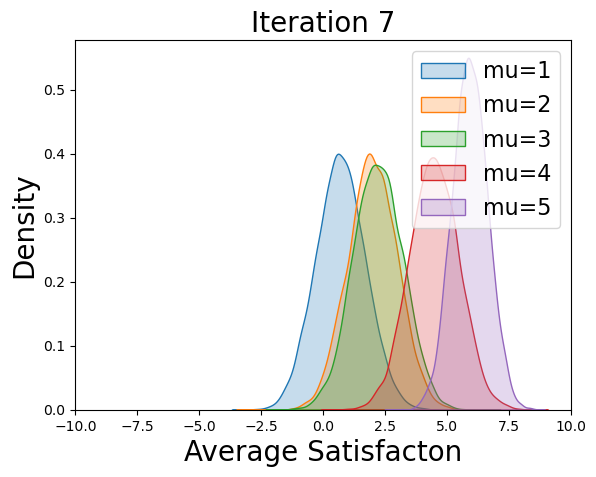

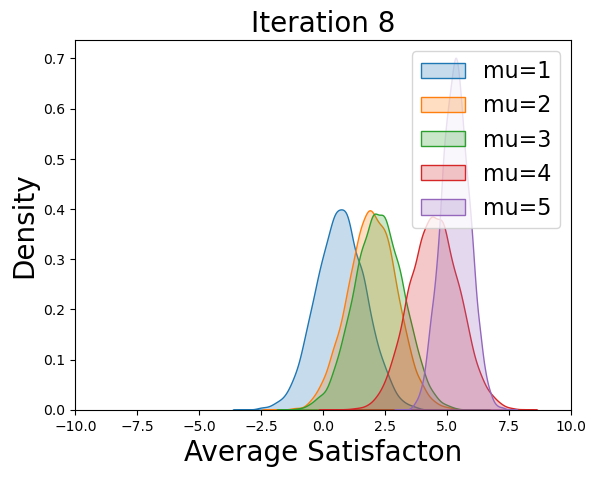

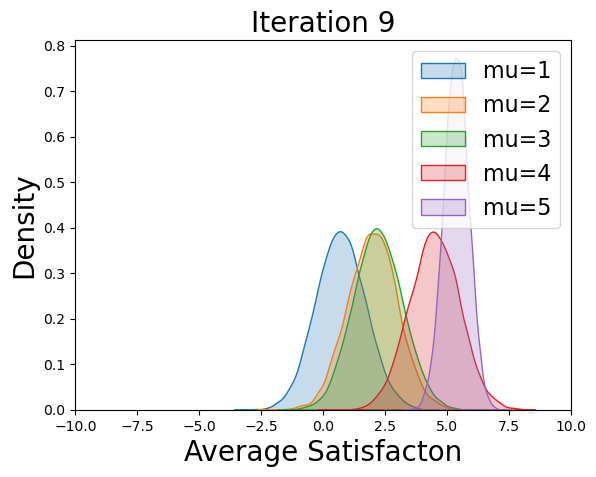

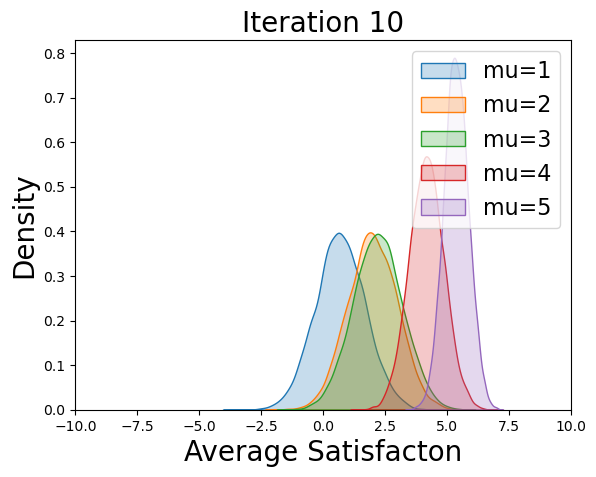

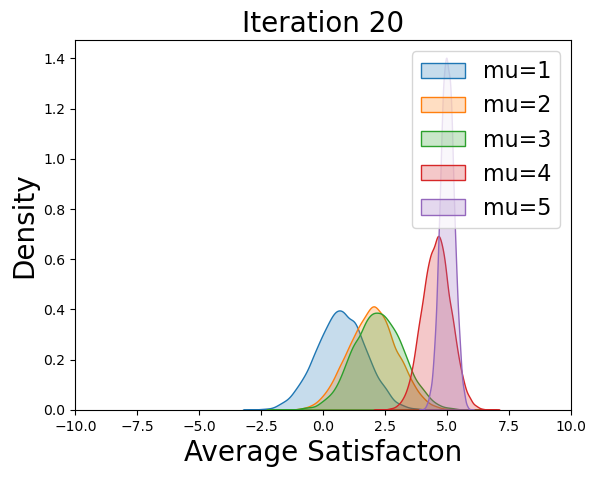

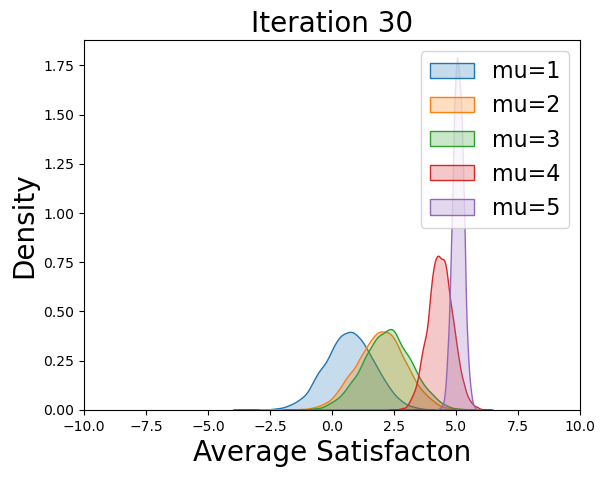

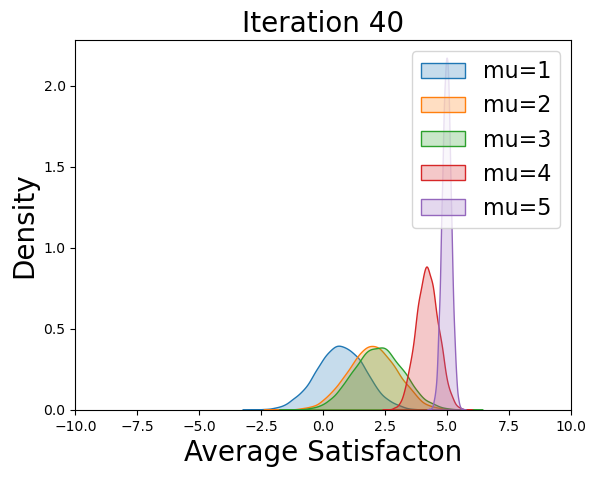

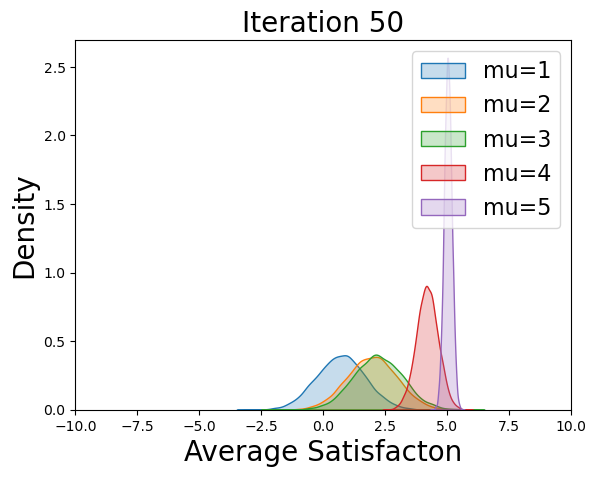

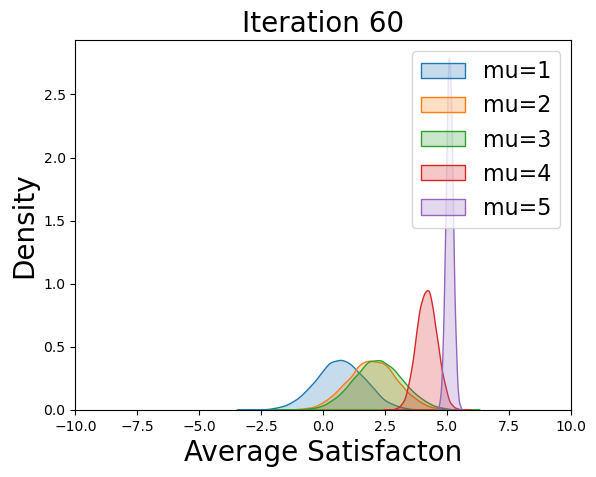

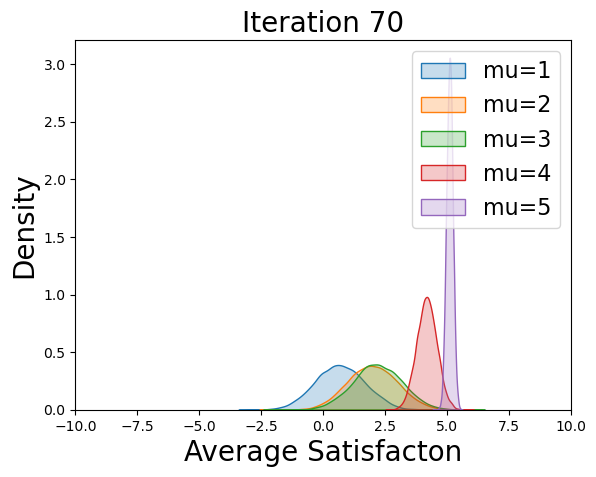

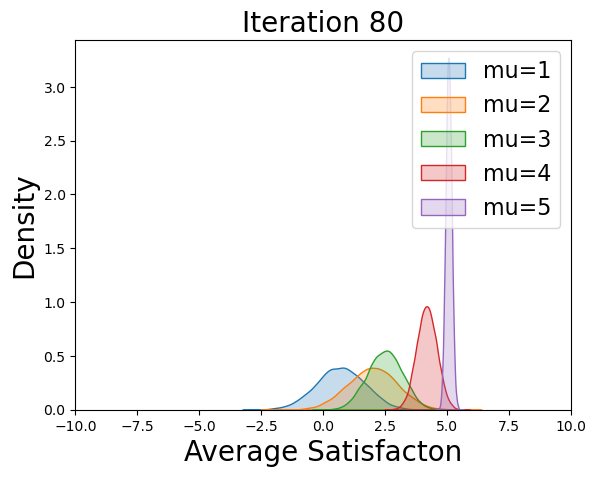

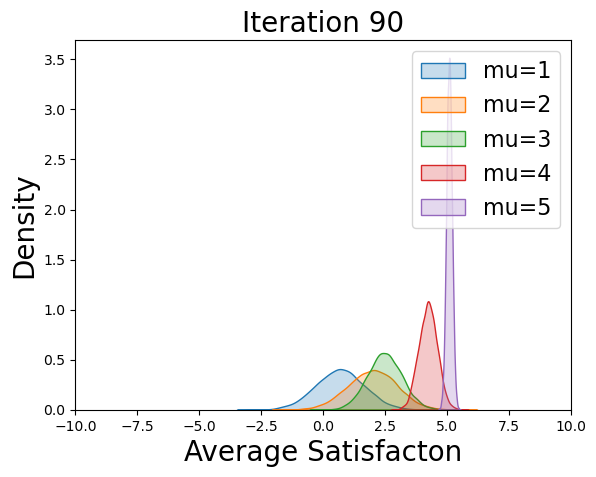

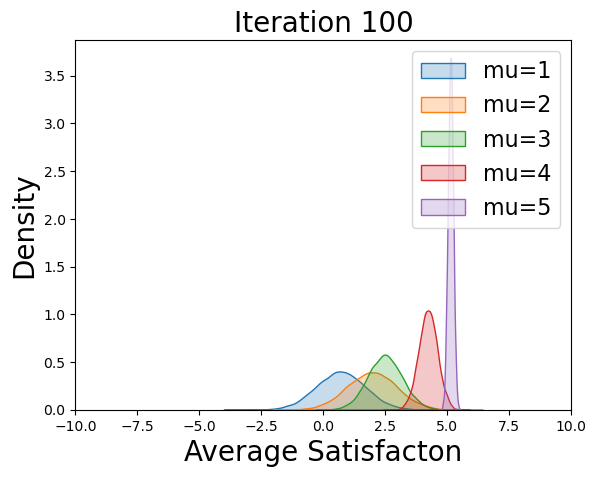

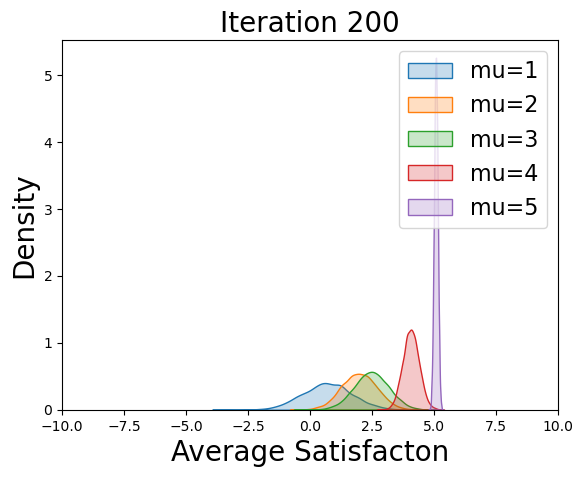

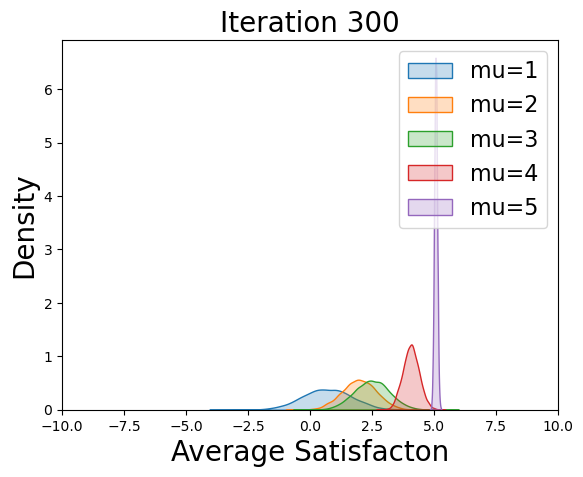

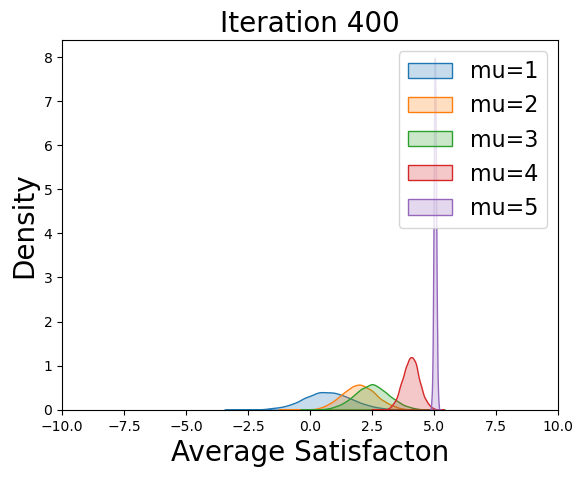

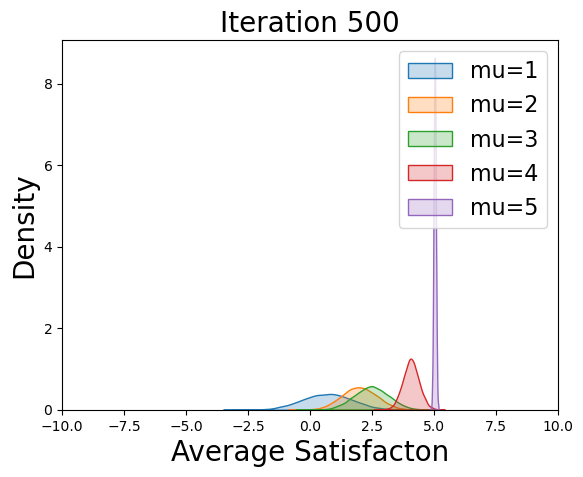

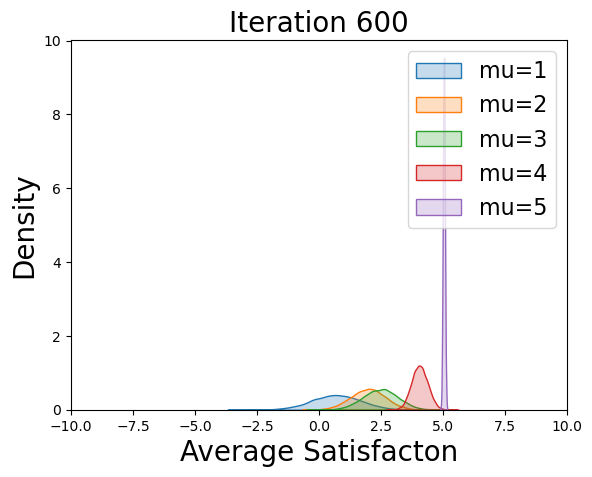

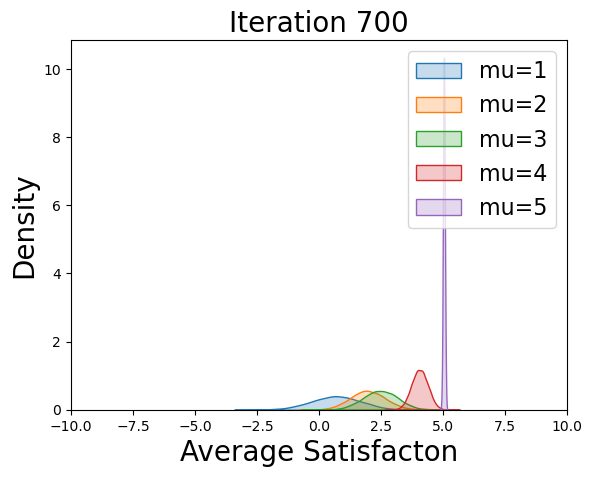

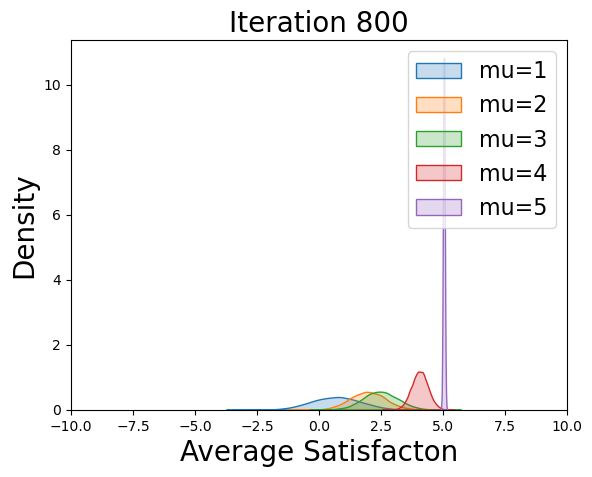

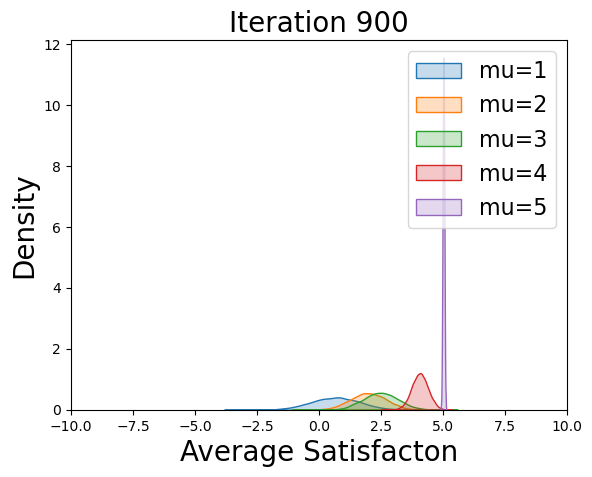

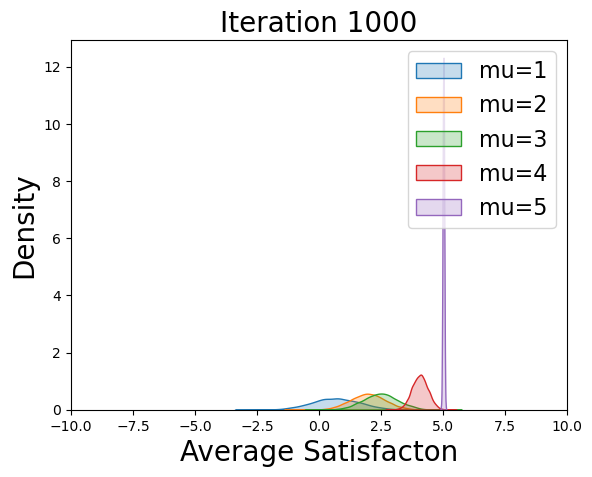

In [4]:
num_restaurants = 5
spacing = 1
R = [RestaurantThompsonSampler(i*spacing, 1) for i in range(1, num_restaurants+1)]

for i in range(1000):
    if num_restaurants <= 10 and (i < 10 or (i < 100 and (i+1) % 10 == 0) or ((i+1) % 100 == 0)):
        draw_distributions(R,i)
    
    #get a sample from each posterior
    post_samps = [r.get_mu_from_current_distribution() for r in R]
    
    #index of distribution with highest satisfaction
    chosen_idx = post_samps.index(max(post_samps))
    
    #get a new sample from that distribution
    s = R[chosen_idx].get_satisfaction_from_true_distribution()
    
    #update that distributions posterior
    R[chosen_idx].update_current_distribution()

Text(0, 0.5, 'Posterior Mean')

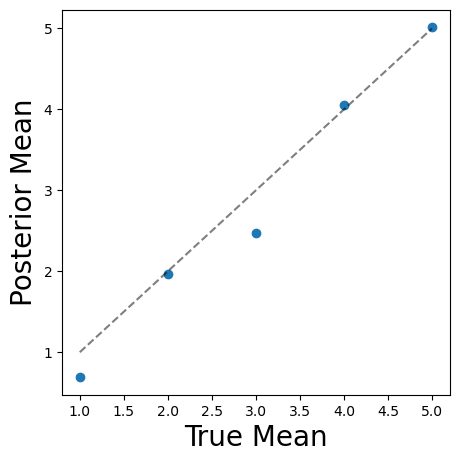

In [5]:
plt.figure(figsize=(5,5))
true_means = [r.mu for r in R]
posterior_means = [r.post_mu_of_mu for r in R]
plt.scatter(true_means, posterior_means)
plt.plot(true_means, true_means, color='k', alpha=0.5, linestyle='--')

plt.xlabel('True Mean', fontsize=20)
plt.ylabel('Posterior Mean', fontsize=20)